# 기계학습_기말과제


### 2013210081 박진호

<hr></hr>

## Data Set Description

#### 본 과제에서 선택한 Data Set은 Mushroom Classification이다. 8100개의 instance와 23개의 feature로 이루어져 있으며, 부제인 'Safe to eat or deadly poison?'를 보면 알 수 있듯 머리, 줄기 등의 모양과 크기, 색깔등의 요소로 구성된 feature를 보여주고, 해당 버섯의 독성 유무를 알려준다.

#### 모델 선정 이유 : 우선 조건에 맞는 Dataset들 중 애초에 Data의 목적 자체가 classification이라는 점이 가장 마음에 들었다. 이번 과제에 있어서 Dataset을 가지고 뭘 classification 해야하나 라는 고민을 하느라 시간을 보내는 것 보다는 classification할 목적이 명확히 정해진 상태에서 다양한 방법을 통해 좋은 결과물을 찾아가는 과정을 수행해보고 싶었기 때문이다.

#### Reference : https://www.kaggle.com/uciml/mushroom-classification

<hr></hr>

## Class Description
class는 'p'와 'e'의 두 개로 구분된다. <br>
각각 p=poisonous, e=edible을 의미하며 독성이 있음과 식용 가능을 의미한다.

<hr></hr>

## Feature Description

#### 본 Data set의 feature은 총 23개이다. 각각의 feature와 해당 feature가 가질 수 있는 value에 대한 설명은 아래와 같다.

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

<hr></hr>

## Overview

본 과제의 진행 순서는 다음과 같다.

1. Load data and Encoding <br>

2. Modeling <br>
    a. DecisionTree (DT) <br>
    b. Naive Bayesian (NB)  <br>
    c. Logistic Regression (LR)  <br>
    d. Single Perceptron (SP)  <br>
    e. Multi Layered Perceptron (MLP)  <br>
    f. k Nearest Neighbors (kNN)  <br>
    g-1. Ensemble - Bagging(DT) <br>
    g-2. Ensemble - Bagging(MLP) <br>
    g-3. Ensemble - Bagging(kNN) <br>
    h. Ensemble - RandomForest <br>
    i-1. Ensemble - Stacking(DT, MLP, kNN, / LR) <br>
    i-2. Ensemble - Stacking(a ~ f / LR) <br>
    i-3. Ensemble - Stacking(Bagging(DT), Bagging(MLP), Bagging(kNN), RandomForest) <br>
    j-1. Ensemble - Voting(DT, MLP, kNN)(voting='hard') <br>
    j-2. Ensemble - Voting(DT, MLP, kNN)(voting='soft') <br>
    j-3. Ensemble - Voting(Bagging(BEST), RandomForest, Stacking(BEST))(voting='soft') 

3. Result - Analysis about performance(time, accuracy) <br>
    : 위의 결과를 통해 적절한 Classifier 선별. <br>

4. Feature selection-1 <br>
    : Eliminate low variance features <br>
    
5. Modeling  <br>
    : 5개의 feature가 제거된 상태의 dataset으로 modeling 수행. <br>
    : a to j-3 <br>
    
6. Result - Analysis about difference <br>
    : feature selection-1 이전의 결과와 비교. 정확도 증감율 표시. <br>
    
7. Feature selection-2 <br>
    a. Filter Method <br>
    b. Another Method <br>
    
8. Modeling with filter method feature set <br>
    : Feature selection-2의 filter method에서 만든 feature set에 대한 modeling 수행. <br>
    : a to j-3 <br>

9. Modeling with another method feature set <br>
    : Feature selection-2의 another method에서 만든 feature set에 대한 modeling 수행. <br>
    : a to j-3 <br>

10. Additional Experiment <br>
    a. kFold and Stratified kFold <br>
    b. Bagging with RF <br>

11. Consequence <br>
    a. Modeling Result <br>
    b. Dataset Analysis <br>
    c. Final solution <br>

<hr></hr>

## 1. Load data and Encoding

In [1]:
import numpy
import pandas as pd

dataset_path = "./mushrooms.csv"
mushrooms = pd.read_csv(dataset_path)

In [2]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
mushrooms.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
mush_enc = mushrooms.apply(label_enc.fit_transform)

In [5]:
mush_enc

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [6]:
mush_enc_x = mush_enc.loc[:, 'cap-shape':'habitat']
mush_enc_y = mush_enc.loc[:, 'class']

In [7]:
mush_enc_x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,3,3


In [8]:
mush_enc_y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

<hr></hr>

## 2. Modeling

testing은 10 stratified fold 사용해 cross validaion을 이용하였다.
또한 모든 modeling에서 그 효율을 알아보기 위해 performance "time을 측정하였다.

In [9]:
from sklearn.model_selection import cross_val_score
import time

### a. DecisionTree (DT)

In [10]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()

In [11]:
time0 = time.time()
scores = cross_val_score(DT,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9581541018862716
6.1058337688446045 seconds


### b. Naive Bayesian (NB)

In [12]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [13]:
time0 = time.time()
scores = cross_val_score(NB,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8462834022887495
6.127206087112427 seconds


### c. Logistic Regression (LR)

In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [15]:
time0 = time.time()
scores = cross_val_score(LR,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8814427399587329
6.422186613082886 seconds


### d. Single Perceptron (SP)

In [16]:
from sklearn.linear_model import Perceptron
SP = Perceptron()

In [18]:
time0 = time.time()
scores = cross_val_score(SP,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8236433851464424
6.10593843460083 seconds


### e. Multi Layered Perceptron (MLP)

In [19]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(20,6), max_iter=100, warm_start=True)

In [20]:
time0 = time.time()
scores = cross_val_score(MLP,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9422481166858525
12.73343276977539 seconds


### f. k Nearest Neighbors (kNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()

In [22]:
time0 = time.time()
scores = cross_val_score(kNN,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9460729847742375
5.81470799446106 seconds


### g-1. Ensemble - Bagging(DT)

Bagging의 경우, 나뉘어진 training set에 대한 estimation을 수행할 classifier를 선택해 주어야 한다. 따라서 위에서 높은 정확도를 보인 Decision Tree와 MLP, 그리고 kNN을 이용해 Bagging을 수행해 보았다.

In [23]:
from sklearn.ensemble import BaggingClassifier
bagging_DT = BaggingClassifier(DT)

In [24]:
time0 = time.time()
scores = cross_val_score(bagging_DT,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9579074927617339
5.8174521923065186 seconds


### g-2. Ensemble - Bagging(MLP)

In [25]:
bagging_MLP = BaggingClassifier(MLP)
time0 = time.time()
scores = cross_val_score(bagging_MLP,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9369457171760374
94.3908805847168 seconds


### g-3. Ensemble - Bagging(kNN)

In [26]:
bagging_kNN = BaggingClassifier(kNN)
time0 = time.time()
scores = cross_val_score(bagging_kNN,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.94780015864277
6.584816932678223 seconds


### h. Ensemble - RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10,bootstrap=False,criterion='gini')

In [28]:
time0 = time.time()
scores = cross_val_score(RF,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9670320303696254
5.812005996704102 seconds


### i-1. Ensemble - Stacking(DT, MLP, kNN, / LR)

Stacking을 사용하기 위해서는 여러개의 classifier가 필요한데, 
높은 정확도를 보였던 3개의 classifier ( DT, MLP, kNN )을 사용해서 한 번 수행하고, 앞에 나왔던 6개의 classifier를 모두 사용해서 한 번 더 수행해 보았다.

Meta classifier로는 Linear Regression을 사용했는데, 이는 LR이 가장 직관적이기 때문이다.

stacking classifier는 scikit-learn이 아닌 mlxtend module에 포함되어 있어, 별도로 mlxtend module을 설치해 주었다.

In [ ]:
!pip install mlxtend

In [30]:
from mlxtend.classifier import StackingClassifier
stacking3 = StackingClassifier(classifiers=[DT, MLP, kNN], meta_classifier=LR)

In [31]:
time0 = time.time()
scores = cross_val_score(stacking3,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9513723509614873
10.436491250991821 seconds


### i-2. Ensemble - Stacking(a ~ f / LR)

In [32]:
stacking6 = StackingClassifier(classifiers=[DT, MLP, kNN, NB, SP, LR], meta_classifier=LR)
time0 = time.time()
scores = cross_val_score(stacking6,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9501393053387993
10.953361749649048 seconds


### i-3. Ensemble - Stacking(Bagging(DT), Bagging(MLP), Bagging(kNN), RandomForest)

In [33]:
stackingB = StackingClassifier(classifiers=[bagging_DT, bagging_MLP, bagging_kNN, RF], meta_classifier=LR)
time0 = time.time()
scores = cross_val_score(stackingB,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9609901068184541
83.25937056541443 seconds


### j-1. Ensemble - Voting(DT, MLP, kNN)(voting='hard')

In [34]:
from sklearn.ensemble import VotingClassifier
voting3h = VotingClassifier(estimators=[('dt', DT), ('mlp', MLP), ('knn', kNN)], voting='hard')

In [35]:
time0 = time.time()
scores = cross_val_score(voting3h,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9448372091612407
9.53418493270874 seconds


### j-2. Ensemble - Voting(DT, MLP, kNN)(voting='soft')

In [36]:
voting3s = VotingClassifier(estimators=[('dt', DT), ('mlp', MLP), ('knn', kNN)], voting='soft')
time0 = time.time()
scores = cross_val_score(voting3s,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9493997812974431
9.440890550613403 seconds


### j-3. Ensemble - Voting(Bagging(BEST), RandomForest, Stacking(BEST))(voting='soft')

In [37]:
votingBs = VotingClassifier(estimators=[('baggingdt', bagging_DT), ('rf', RF), ('stackingB', stackingB)], voting='soft')
time0 = time.time()
scores = cross_val_score(votingBs,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9650591573733246
82.1752552986145 seconds


<hr>

## 3. Result
### Analysis about performance(time, accuracy)

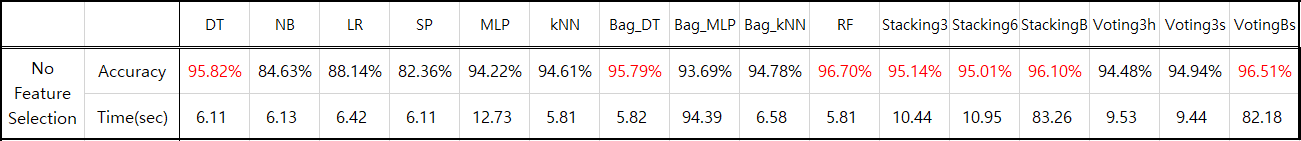

총 16개의 방법으로 Modeling을 수행한 결과, 가장 높은 정확도를 보인 것은 RandomForest였다.

그리고 stackingB와 DT, votingBs가 뒤를 이었으나, stackingB와 votingBs는 Ensemble 기법으로, 안에 사용된 classifier들 중 RF(RandomForest)가 있는 모델이기 때문에, 결과적으로 RandomForest의 영향에 의한 결과인 것으로 추측된다.

가장 낮은 정확도를 보인 Classifier는 SP(SinglePerceptron)이었으며, 그래도 82.36%의 정확도를 보인 것으로 보아 본 data set 자체가 classification이 어렵지 않은 형태인 것으로 추측할 수 있다.

수행시간이 가장 오래 걸린 것은 votingBs였는데, votingBs의 estimator중에는 bag_MLP(bagging MLP)가 포함되어있고, bag_MLP의 수행시간이 94초인 것으로 보아 큰 영향을 받았다고 생각할 수 있고, MLP 자체의 수행시간도 12.7초에 해당하므로 bag_MLP의 수행시간이 저렇게 크게 나온 것을 납득할 수 있다.

또한 Ensemble 기법인 stacking은 여러개의 classifier를 사용하는데, stacking3와 stacking6를 보면 사용된 classifier들 중 성능이 낮은 classifier가 추가된다면, 해당 classifier가 없을 때 보다 정확도가 떨어지는 결과를 보였다. 이는 Ensemble기법에서 낮은 정확도를 가진 classifier는 모델 전체에 악영향을 끼칠 수 있음을 의미한다.

<hr>

## 4. Feature selection - 1

이번에는 feature들의 variance를 기준으로 low variance를 가진 feature를 제거한다.

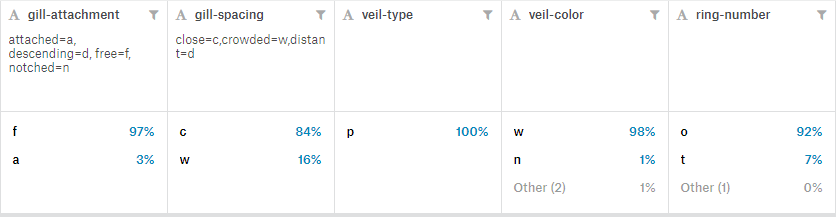

위 그림은 dataset을 제공한 kaggle에서 각 feature들에 대해 value들의 portion을 나타낸 것의 일부를 캡쳐한 것이다. <br>
자료를 보면, 위에 나타난 5개의 Feature는 하나의 value가 80%이상의 portion을 차지하고 있다. <br>
이런 분포를 가진 feature는 irrelevant하다고 판단할 수 있기 때문에, 주어진 data set에서 위 5개 feature를 제거한다.

이는 std함수를 이용해 variance를 측정함으로써 확인할 수도 있다

In [38]:
mush_enc.std()

class                       0.499708
cap-shape                   1.604329
cap-surface                 1.229873
cap-color                   2.545821
bruises                     0.492848
odor                        2.103729
gill-attachment             0.158695
gill-spacing                0.368011
gill-size                   0.462195
gill-color                  3.540359
stalk-shape                 0.495493
stalk-root                  1.061106
stalk-surface-above-ring    0.621459
stalk-surface-below-ring    0.675974
stalk-color-above-ring      1.901747
stalk-color-below-ring      1.907291
veil-type                   0.000000
veil-color                  0.242669
ring-number                 0.271064
ring-type                   1.801672
spore-print-color           2.382663
population                  1.252082
habitat                     1.719975
dtype: float64

보다시피 위에 나타난 5개의 feature가 variance가 제일 낮게 나온 것을 확인할 수 있다.
따라서 5개의 feature를 제거해주었다.

In [39]:
mush_enc=mush_enc.drop(columns=['gill-attachment', 'gill-spacing', 'veil-type', 'veil-color', 'ring-number'])
mush_enc.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [40]:
mush_enc_x = mush_enc.loc[:, 'cap-shape':'habitat']
mush_enc_y = mush_enc.loc[:, 'class']

In [41]:
mush_enc_x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,4,0,3,2,2,7,7,4,2,3,5
1,5,2,9,1,0,0,4,0,2,2,2,7,7,4,3,2,1
2,0,2,8,1,3,0,5,0,2,2,2,7,7,4,3,2,3
3,5,3,8,1,6,1,5,0,3,2,2,7,7,4,2,3,5
4,5,2,3,0,5,0,4,1,3,2,2,7,7,0,3,0,1
5,5,3,9,1,0,0,5,0,2,2,2,7,7,4,2,2,1
6,0,2,8,1,0,0,2,0,2,2,2,7,7,4,2,2,3
7,0,3,8,1,3,0,5,0,2,2,2,7,7,4,3,3,3
8,5,3,8,1,6,1,7,0,3,2,2,7,7,4,2,4,1
9,0,2,9,1,0,0,2,0,2,2,2,7,7,4,2,3,3


In [42]:
mush_enc_y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

<hr>

## 5. Modeling
### Feature 5개를 제거한 후 변화가 있는지 확인하기 위해 다시 Modeling을 진행하였다.

### a. DecisionTree (DT)

In [43]:
time0 = time.time()
scores = cross_val_score(DT,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9625930661279485
5.382838249206543 seconds


### b. Naive Bayesian (NB)

In [44]:
time0 = time.time()
scores = cross_val_score(NB,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8530262710239793
5.1914660930633545 seconds


### c. Logistic Regression (LR)

In [45]:
time0 = time.time()
scores = cross_val_score(LR,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8686260424982388
5.683037519454956 seconds


### d. Single Perceptron (SP)

In [46]:
time0 = time.time()
scores = cross_val_score(SP,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8348500004060618
5.792787313461304 seconds


### e. Multi Layered Perceptron (MLP)

In [47]:
time0 = time.time()
scores = cross_val_score(MLP,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9379342769999832
9.659351587295532 seconds


### f. k Nearest Neighbors (kNN)

In [48]:
time0 = time.time()
scores = cross_val_score(kNN,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9461971993332756
5.4635608196258545 seconds


### g-1. Ensemble - Bagging(DT)

In [49]:
time0 = time.time()
scores = cross_val_score(bagging_DT,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9596337566334971
5.490346908569336 seconds


### g-2. Ensemble - Bagging(MLP)

In [50]:
time0 = time.time()
scores = cross_val_score(bagging_MLP,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9449620303847921
84.11946320533752 seconds


### g-3. Ensemble - Bagging(kNN)

In [51]:
time0 = time.time()
scores = cross_val_score(bagging_kNN,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9463192905665185
5.891429424285889 seconds


### h. Ensemble - RandomForest

In [52]:
time0 = time.time()
scores = cross_val_score(RF,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9670320303696254
5.599785327911377 seconds


### i-1. Ensemble - Stacking(DT, MLP, kNN, / LR)

In [53]:
time0 = time.time()
scores = cross_val_score(stacking3,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9474275149656552
11.633371353149414 seconds


### i-2. Ensemble - Stacking(a ~ f / LR)

In [54]:
time0 = time.time()
scores = cross_val_score(stacking6,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9440976851198843
11.551284074783325 seconds


### i-3. Ensemble - Stacking(Bagging(DT), Bagging(MLP), Bagging(kNN), RandomForest)

In [55]:
time0 = time.time()
scores = cross_val_score(stackingB,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9627163706902173
81.95732736587524 seconds


### j-1. Ensemble - Voting(DT, MLP, kNN)(voting='hard')

In [56]:
time0 = time.time()
scores = cross_val_score(voting3h,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9445906000367031
11.264399528503418 seconds


### j-2. Ensemble - Voting(DT, MLP, kNN)(voting='soft')

In [57]:
time0 = time.time()
scores = cross_val_score(voting3s,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9463168639084664
11.874561786651611 seconds


### j-3. Ensemble - Voting(Bagging(BEST), RandomForest, Stacking(BEST))(voting='soft')

In [58]:
time0 = time.time()
scores = cross_val_score(votingBs,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9620998478788734
89.32999515533447 seconds


## 6. Result - Analysis about difference

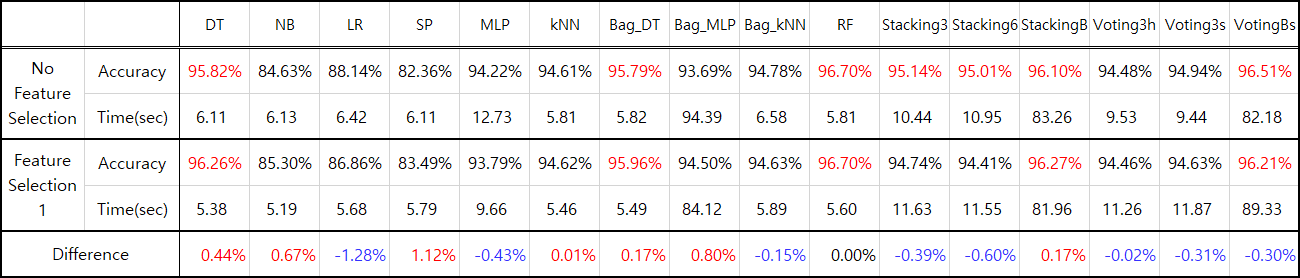

위 그림은 feature selection 이전의 dataset과 이후의 dataset에 대해 동일한 classifier를 적용시킨 결과의 정확도와 수행시간을 표로 나타낸 것이다. 

표를 보면 여전히 RandomForest가 가장 높은 정확도를 보이고 있고, stackingB, DT, votingBs, bagging_DT가 그 뒤를 잇는다. 상위권에 존재하는 Classifier들 간에 주목할 만한 순위변동은 존재하지 않으며, 상위권에 위치하던 대부분의 classifier들은 정확도가 증가했다.

16개의 Classifier들 중 8개의 classifier의 정확도는 감소했고, 7개의 classifier는 정확도가 증가했으며, RF의 경우 정확도에 변동이 없었다.

5개의 feature가 사라졌기 때문인지 전체적인 수행시간이 줄어들었으며, 특히 긴 수행시간을 갖던 MLP의 경우 12.73초에서 9.66초로 3.07초 단축, MLP를 이용했던 bagging_MLP의 경우 94.39초에서 84.12초로 10.27초 단축되었다. 마찬가지로 StackingB의 수행시간도 줄었으나, 어떤 이유에선지 VotingBs는 약간 수행시간이 늘었다.

아무래도 feature수는 MLP의 input layer 수를 정하는 요인이고, 그에 따라 학습시켜야 할 가중치의 갯수가 5개나 줄었기 때문에 학습에 시간이 덜 소요되는 것으로 사려된다.

결과적으로 약간의 변화가 있기는 했으나, 원래의 정확도도 상당히 높은 편이어서 오차범위 이내의 변화라고 판단할 수도 있다. 다만, 그걸 감안하더라도 전체적인 부분에서 개선이 이루어졌음은 무시할 수 없다고 생각된다.

<hr>

## 7. Feature selection-2

Feature를 5개 줄여 22개(class제외) 중 17개의 feature가 남았으나, 아직 feature 수를 더 줄일 수 있을 것이라 생각했다.

따라서 앞에서 classification을 수행한 여러 classifier들 중, 고정적으로 높은 성적을 낸 RandomForest classifier를 이용해 각각의 feature들에 대한 평가를 진행하고, 불필요하거나 영향력이 미비한 feature를 골라 제거해 보았다.

In [59]:
mush_enc

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,4,0,3,2,2,7,7,4,2,3,5
1,0,5,2,9,1,0,0,4,0,2,2,2,7,7,4,3,2,1
2,0,0,2,8,1,3,0,5,0,2,2,2,7,7,4,3,2,3
3,1,5,3,8,1,6,1,5,0,3,2,2,7,7,4,2,3,5
4,0,5,2,3,0,5,0,4,1,3,2,2,7,7,0,3,0,1
5,0,5,3,9,1,0,0,5,0,2,2,2,7,7,4,2,2,1
6,0,0,2,8,1,0,0,2,0,2,2,2,7,7,4,2,2,3
7,0,0,3,8,1,3,0,5,0,2,2,2,7,7,4,3,3,3
8,1,5,3,8,1,6,1,7,0,3,2,2,7,7,4,2,4,1
9,0,0,2,9,1,0,0,2,0,2,2,2,7,7,4,2,3,3


In [60]:
mush_enc.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

우선 신뢰할 수 있을만한 기준치를 구하기 위해 RandomForest로 CV를 10번 수행하고 그 평균값을 구했다.

In [61]:
time0 = time.time()
default_score=0
for i in range(0, 10):
    scores = cross_val_score(RF, mush_enc_x, mush_enc_y, cv=10, n_jobs=-1)
    default_score = default_score + ((scores.mean())/10)
time1 = time.time()
print(default_score, time1-time0)

0.9673033004066168 55.42285895347595


### a. Filter methods

Filter method 방법으로 feature selection을 수행하기 위해 각각의 feature에 대해 해당 feature가 dataset classification에 얼마나 도움이 되는 지를 평가해야 한다.

다양한 방식으로 feature evaluation을 수행할 수 있으나, 이번에는 해당 feature가 전체 dataset에서 사라졌을 때, 모델의 정확도가 얼마나 감소하는 지를 그 기준으로 두었다.

가장 높은 정확도를 보였던 classifier가 RandomForest였기에, 해당 classifier를 사용한다. 하지만 RandomForest는 동일한 input에 대해 고정적인 model을 만들지 않기 때문에, 불확실성을 띈다. 따라서 RandomForest로 10번의 Classification을 수행한 뒤, 정확도를 평균 내어 그 결과값으로 feature evaluation을 수행한다.

In [62]:
mush_temp_x = mush_enc_x
mush_temp_y = mush_enc_y
#for j in range(0,3) : 
#    min=999
for i in mush_temp_x.columns :
    mush_temp2_x = mush_temp_x.drop(columns=[i])
    temp_score=0
    #for k in range(0, 5) :
    scores = cross_val_score(RF, mush_temp2_x, mush_temp_y, cv=10, n_jobs=-1)
    temp_score = scores.mean() #temp_score + (scores.mean()/5)
    print(i, ":", temp_score)
    
    #if (default_score - temp_score) < min :
    #    min = default_score - temp_score
    #    pos = i
    #    now_score = temp_score
#print(now_score)
#print(min)
#print(pos)

cap-shape : 0.9651824619355935
cap-surface : 0.9581541018862716
cap-color : 0.9675252486187007
bruises : 0.9677718577432384
odor : 0.9672786394941632
gill-size : 0.9669087258073568
gill-color : 0.9674019440564319
stalk-shape : 0.9672786394941632
stalk-root : 0.9660455938714752
stalk-surface-above-ring : 0.9680184668677759
stalk-surface-below-ring : 0.9685116851168513
stalk-color-above-ring : 0.9681417714300448
stalk-color-below-ring : 0.9680184668677759
ring-type : 0.9614833250675293
spore-print-color : 0.9638264150828931
population : 0.9677718577432384
habitat : 0.9670320303696254


이것은 각 feature를 한 번씩 빼서 실행했을 때의 정확도이다. <br>
이를 10번 반복하면

In [63]:
time0 = time.time()
mush_temp_x = mush_enc_x
mush_temp_y = mush_enc_y
for i in mush_temp_x.columns :
    mush_temp2_x = mush_temp_x.drop(columns=[i])
    temp_score=0
    for k in range(0, 10) :
        scores = cross_val_score(RF, mush_temp2_x, mush_temp_y, cv=10, n_jobs=-1)
        temp_score = temp_score + (scores.mean()/10)
    print(i, ":", temp_score)
time1 = time.time()
print(time1-time0, "seconds")

cap-shape : 0.9672539785817094
cap-surface : 0.9666127948579115
cap-color : 0.9659467075558548
bruises : 0.9661072461526093
odor : 0.9661057901577783
gill-size : 0.9663168639084665
gill-color : 0.9671430044756675
stalk-shape : 0.9665634730330039
stalk-root : 0.9668663957909616
stalk-surface-above-ring : 0.9666374557703652
stalk-surface-below-ring : 0.9664524989269621
stalk-color-above-ring : 0.9665758034892308
stalk-color-below-ring : 0.9673772831439782
ring-type : 0.9675989886902568
spore-print-color : 0.964786522341179
population : 0.963974077225359
habitat : 0.9656140279035341
941.3609738349915 seconds


위와 같은 값을 얻을 수 있다. <br>
따라서 위 결과를 바탕으로 영향력이 큰 feature들을 순서대로 나타내면 다음과 같다.

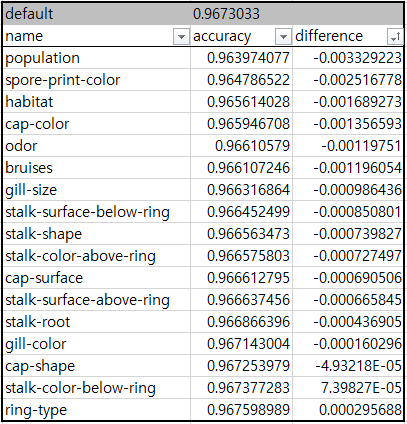

이 내용을 바탕으로 feature를 상위 2개, 3개, 4개, 5개, 8개, 10개를 뽑아 다시 classification을 수행한다.

상위 2개.

In [69]:
mushA_x = mush_enc_x.loc[:,['population','spore-print-color']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushA_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9038382156415758
56.80239534378052 seconds


상위 3개.

In [70]:
mushB_x = mush_enc_x.loc[:,['population','spore-print-color', 'habitat']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushB_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.941934502026196
56.569963693618774 seconds


상위 4개.

In [75]:
mushBB_x = mush_enc_x.loc[:,['population','spore-print-color', 'habitat', 'cap-color']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushBB_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9538577039919326
57.79526209831238 seconds


상위 5개.

In [71]:
mushC_x = mush_enc_x.loc[:, ['population','spore-print-color', 'habitat', 'cap-color', 'odor']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushC_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9685116851168512
57.43028402328491 seconds


상위 8개.

In [73]:
mushD_x = mush_enc_x.loc[:, ['population','spore-print-color', 'habitat', 'cap-color', 'odor', 'bruises', 'gill-size', 'stalk-surface-below-ring']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushD_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9668337724067746
57.40183925628662 seconds


상위 10개.

In [74]:
mushE_x = mush_enc_x.loc[:, ['population','spore-print-color', 'habitat', 'cap-color', 'odor', 'bruises', 'gill-size', 'stalk-surface-below-ring', 'stalk-shape', 'stalk-color-above-ring']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushE_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9689023770632281
58.84607172012329 seconds


결과적으로 상위 4개의 feature로 95%이상의 정확도를 만족시킬 수 있었고, 5개부터는 큰 폭의 정확도 향상이 이루어지지 않았다. 

애초에 evaluation결과에서부터 feature들 간의 차이가 크지 않은 점으로 미루어 보아, 이 dataset은 몇몇 feature들을 제외하고는 classification에 기여하는 정도가 비슷할 수도 있을 것이라는 가능성을 생각해 보았다. 이를 확인하기 위해 아무런 기준 없이 임의로 4개의 feature를 선택하여 classification을 수행해 보았다.

6, 7, 14, 17위의 features를 조합.

In [76]:
mushF_x = mush_enc_x.loc[:, ['gill-color', 'gill-size', 'bruises', 'ring-type']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushF_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9066680316618211
58.754743814468384 seconds


4, 5, 10, 12위의 features를 조합.

In [77]:
mushF_x = mush_enc_x.loc[:, ['stalk-color-above-ring', 'stalk-surface-above-ring', 'cap-color', 'odor']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushF_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9502375546566811
60.012386322021484 seconds


14, 15, 16, 17위의 features를 조합.

In [78]:
mushF_x = mush_enc_x.loc[:, ['gill-color', 'cap-shape', 'stalk-color-below-ring', 'ring-type']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushF_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.8878617654240663
59.60498094558716 seconds


5, 6, 7, 8위의 features를 조합.

In [79]:
mushF_x = mush_enc_x.loc[:, ['odor', 'bruises', 'gill-size', 'stalk-surface-below-ring']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushF_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9911439114391142
56.70594596862793 seconds


3, 4, 5, 6위의 features를 조합.

In [80]:
mushF_x = mush_enc_x.loc[:, ['habitat', 'cap-color', 'odor', 'bruises']]
score=0
time0 = time.time()
for i in range(0, 10):
    scores = cross_val_score(RF, mushF_x, mush_enc_y, cv=10, n_jobs=-1)
    score = score + ((scores.mean())/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9807109804760196
56.84250330924988 seconds


실험 결과, 어느정도 feature evaluation 결과의 신빙성이 있음을 확인할 수 있었다. 전반적으로 순위가 낮은 feature들을 조합해 classification을 수행했을 때, 88%까지 정확도가 떨어졌다는 것이 그 증거이다.

또한 의외의 결과도 찾을 수 있었는데, 1,2,3,4위의 feature들로 조합했을 때 95%의 정확도를 보였던 반면, 지금껏 가장 높은 정확도인 96.85%보다도 훨씬 높은 99.11%의 정확도가 5,6,7,8위의 feature들로 돌렸을 때 나온 것이다.

분명 feature evaluation은 어느정도 의미가 있었다고 할 수 있으나, 3,4,5,6위의 features로 classification을 수행한 결과조차 1,2,3,4위의 features로 classification한 결과보다 높게 나왔다.

이는 두 가지 가능성을 제시하는데, 첫째는 feature evaluation의 정밀도 문제일 것이다. 불확실성을 줄이기 위해 10번의 반복시행에 대한 평균치로 그 evaluation을 수행하였으나, 두 번의 실행결과의 순위가 상이했었다. (시간관계상 그 이상은 시행해보지 못했다.) 따라서 10번으로는 수치를 안정화시키지 못 하였거나, 애초에 저런 방식의 evaluation이 feature evaluation을 완벽히 수행하지 못했다고 추측할 수 있다.

두 번째는 synergy effect이다. feature evaluation이 어느정도 잘 수행되었다고 할 때, 적당한 정도의 evaluation 수치를 지닌 feature들 몇몇이 특별한 관계를 가지고 있어 그들을 조합해서 classification에 사용하면 각각이 가지고 있던 특징이 맞물려 시너지 효과가 발생하는 것이다. 이는 실제로 feature subset selection 방법 중 wrapper method의 논리와 어느정도 일치하는데, wrapper method 자체도 feature하나하나에 집중하는 것이 아니라, feature간의 연관관계에 무언가 의미가 있을 것이라는 전제 하에 모든 subset을 구해 evaluation하는 방식이기 때문이다. 마찬가지로, 99%의 정확도를 보인 5,6,7,8 feature set 은 무언가 feature들 간에 시너지 효과가 발생하는 조합으로써, 각자의 영향력은 매우 크지 않아도 함께 적용되었을 때 큰 효과를 내는 조합일 것이라고 추측할 수 있다.

### b. Another method

앞서 filter method에서는 각각의 feature를 따로 평가해 좋은 성적을 거둔 feature들로 학습을 진행했다. 이번에는 여러개의 feature간에 주고받는 영향력을 무시할 수 없다고 판단해 (여기에서도 wrapper method의 근간이 되는 논리가 사용되었다.) 하나의 feature가 제거될 때마다 다른 모든 feature들 간에 다시금 평가를 진행하여 다음 제거될 feature를 뽑는다. 그렇게 feature들을 제거하다가 목표하고자 하는 정확도 (=95%)보다 낮은 정확도가 되면 마지막으로 제거한다고 가정한 feature를 제거하지 않고 for문을 마친다.

In [118]:
mush_temp_x = mush_enc_x
mush_temp_y = mush_enc_y
for j in range(15) :
    min = 999
    for i in mush_temp_x.columns :
        mush_temp2_x = mush_temp_x.drop(columns=[i])
        temp_score=0
        for k in range(0, 10) :
            scores = cross_val_score(RF, mush_temp2_x, mush_temp_y, cv=10, n_jobs=-1)
            temp_score = temp_score + (scores.mean()/10)
        if(default_score - temp_score) < min :
            min = default_score - temp_score
            pos=i
            now_score = temp_score
    print("dif :", min, "pos :", pos, "score :", now_score)
    if now_score < 0.95 : break
    mush_temp_x = mush_temp_x.drop(columns=[pos])

dif : -0.0005297242861455054 pos : gill-color score : 0.9678330246927623
dif : -0.0027322653004581143 pos : ring-type score : 0.9700355657070749
dif : -0.0033577212467563733 pos : stalk-root score : 0.9706610216533732
dif : -0.010085008864885281 pos : spore-print-color score : 0.9773883092715021
dif : -0.017120891554168405 pos : population score : 0.9844241919607852
dif : -0.020098461650461252 pos : cap-color score : 0.9874017620570781
dif : -0.02120529072121813 pos : cap-shape score : 0.988508591127835
dif : -0.024010810761621815 pos : stalk-color-below-ring score : 0.9913141111682386
dif : -0.026446417115219223 pos : stalk-surface-below-ring score : 0.993749717521836
dif : -0.024919381869528023 pos : stalk-color-above-ring score : 0.9922226822761449
dif : -0.02255775825329165 pos : stalk-shape score : 0.9898610586599085
dif : -0.01802985699400772 pos : cap-surface score : 0.9853331574006245
dif : -0.02384061103249735 pos : habitat score : 0.9911439114391142
dif : -0.01891813517395391

위 소스 한 번을 수행하는데 거의 3시간 반 가량의 시간이 소요되었다. 그에 따라 한 번 밖에 수행해보지 못했는데, 생각 이상으로 흥미로운 결과를 얻을 수 있었다

다행히 소스는 제대로 구성되어 있었는지, 중복된 feature가 출력되거나 하는 일은 없었다. 결과를 보면, 초반에 9개의 feature를 제거하는 동안은 정확도가 꾸준히 증가하였으며, 10번째 feature를 제거하고부터는 정확도가 조금씩 감소하기 시작했다. 가장 높은 정확도를 보인 순간은 9개의 feature를 제거하고 ['habitat', 'odor', 'bruises', 'gill-size', 'stalk-shape', 'stalk-color-above-ring', 'cap-surface', 'stalk-surface-above-ring']의 8개의 feature로 구성된 feature set으로 학습을 진행했을 때였다.

이를 확인하기위해 실제로 저 feature만 추출하였을 때 동일한 성능이 나오는 지 재차 확인해보았다.

In [119]:
mush_AM_x = mush_enc_x.loc[:, ['habitat', 'odor', 'bruises', 'gill-size', 'stalk-shape', 'stalk-color-above-ring', 'cap-surface', 'stalk-surface-above-ring']]
mush_AM_y = mush_enc_y

In [121]:
mush_AM_x

,habitat,odor,bruises,gill-size,stalk-shape,stalk-color-above-ring,cap-surface,stalk-surface-above-ring
0,5,6,1,1,0,7,2,2
1,1,0,1,0,0,7,2,2
2,3,3,1,0,0,7,2,2
3,5,6,1,1,0,7,3,2
4,1,5,0,0,1,7,2,2
5,1,0,1,0,0,7,3,2
6,3,0,1,0,0,7,2,2
7,3,3,1,0,0,7,3,2
8,1,6,1,1,0,7,3,2
9,3,0,1,0,0,7,2,2


In [125]:
time0 = time.time()
score=0
for k in range(0, 10) :
    scores = cross_val_score(RF,mush_AM_x,mush_AM_y,cv=10,n_jobs=-1)
    score = score + (scores.mean()/10)
time1 = time.time()

print(score)
print(time1-time0, "seconds")

0.9945369253939148
61.22710466384888 seconds


실험결과, 99.45%의 더 높은 성공률을 보였다. 개별적으로 수행했을 때는 1.0의 값도 나오는 것으로 보아 위에서 사용한 feature selection method는 정상적으로 잘 동작한 것으로 보인다.

filter method에서 99.11%의 정확도를 보인 feature set을 보인 것도 매우 놀라운 결과였으나, 이번 방법에서 구해진 feature set이 그보다도 높은 성능을 보인 것은 더욱 놀라웠다. 여태까지 찾은 feature set들 중 가장 높은 정확도를 보였으므로, 이 feature set이 가장 완벽에 가깝다고 판단하고 마지막 Modeling을 수행한다.

<hr>

## 8. Modeling with filter method feature set

두 번째 feature selection을 수행한 결과, 약간의 우연에 의해 ['odor', 'bruises', 'gill-size', 'stalk-surface-below-ring'] 의 4개의 feature로 classification을 수행하는 것이 99.11%로 상당히 좋은 성능을 낸다는 것을 알게 되었다. 따라서 4개의 feature만으로 data set을 구성하고, 기존의 16가지 모델링 알고리즘에 적용시켜 그 결과를 비교/분석 해 보았다.

In [81]:
mush_99_x = mush_enc_x.loc[:, ['odor', 'bruises', 'gill-size', 'stalk-surface-below-ring']]
mush_99_y = mush_enc_y

In [83]:
mush_99_x

,odor,bruises,gill-size,stalk-surface-below-ring
0,6,1,1,2
1,0,1,0,2
2,3,1,0,2
3,6,1,1,2
4,5,0,0,2
5,0,1,0,2
6,0,1,0,2
7,3,1,0,2
8,6,1,1,2
9,0,1,0,2


In [122]:
mush_99_y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

### a. DecisionTree (DT)

In [86]:
time0 = time.time()
scores = cross_val_score(DT,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
5.606210708618164 seconds


### b. Naive Bayesian (NB)

In [87]:
time0 = time.time()
scores = cross_val_score(NB,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8554030309198148
5.591059446334839 seconds


### c. Logistic Regression (LR)

In [88]:
time0 = time.time()
scores = cross_val_score(LR,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8571562913624071
5.997352123260498 seconds


### d. Single Perceptron (SP)

In [89]:
time0 = time.time()
scores = cross_val_score(SP,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.6397984847642297
5.9001219272613525 seconds


### e. Multi Layered Perceptron (MLP)

In [90]:
time0 = time.time()
scores = cross_val_score(MLP,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9889298892988929
9.85269284248352 seconds


### f. k Nearest Neighbors (kNN)

In [91]:
time0 = time.time()
scores = cross_val_score(kNN,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
5.580697536468506 seconds


### g-1. Ensemble - Bagging(DT)

In [92]:
time0 = time.time()
scores = cross_val_score(bagging_DT,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
5.793900966644287 seconds


### g-2. Ensemble - Bagging(MLP)

In [93]:
time0 = time.time()
scores = cross_val_score(bagging_MLP,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9826358966425669
75.1533875465393 seconds


### g-3. Ensemble - Bagging(kNN)

In [94]:
time0 = time.time()
scores = cross_val_score(bagging_kNN,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
5.987138748168945 seconds


### h. Ensemble - RandomForest

In [95]:
time0 = time.time()
scores = cross_val_score(RF,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
5.693782806396484 seconds


### i-1. Ensemble - Stacking(DT, MLP, kNN, / LR)

In [96]:
time0 = time.time()
scores = cross_val_score(stacking3,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
9.95516848564148 seconds


### i-2. Ensemble - Stacking(a ~ f / LR)

In [97]:
time0 = time.time()
scores = cross_val_score(stacking6,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
9.94467830657959 seconds


### i-3. Ensemble - Stacking(Bagging(DT), Bagging(MLP), Bagging(kNN), RandomForest)

In [98]:
time0 = time.time()
scores = cross_val_score(stackingB,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
72.87922883033752 seconds


### j-1. Ensemble - Voting(DT, MLP, kNN)(voting='hard')

In [99]:
time0 = time.time()
scores = cross_val_score(voting3h,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
9.854137659072876 seconds


### j-2. Ensemble - Voting(DT, MLP, kNN)(voting='soft')

In [100]:
time0 = time.time()
scores = cross_val_score(voting3s,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
9.95239806175232 seconds


### j-3. Ensemble - Voting(Bagging(BEST), RandomForest, Stacking(BEST))(voting='soft')

In [101]:
time0 = time.time()
scores = cross_val_score(votingBs,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
85.80270075798035 seconds


<hr>

## 9. Modeling with another method feature set

가장 높은 성공률을 보였던 ['habitat', 'odor', 'bruises', 'gill-size', 'stalk-shape', 'stalk-color-above-ring', 'cap-surface', 'stalk-surface-above-ring']의 8개짜리 feature set으로도 별도로 Modeling을 진행해 그 결과를 비교한다.

In [126]:
mush_fin_x = mush_enc_x.loc[:, ['habitat', 'odor', 'bruises', 'gill-size', 'stalk-shape', 'stalk-color-above-ring', 'cap-surface', 'stalk-surface-above-ring']]
mush_fin_y = mush_enc_y

In [127]:
mush_fin_x

,habitat,odor,bruises,gill-size,stalk-shape,stalk-color-above-ring,cap-surface,stalk-surface-above-ring
0,5,6,1,1,0,7,2,2
1,1,0,1,0,0,7,2,2
2,3,3,1,0,0,7,2,2
3,5,6,1,1,0,7,3,2
4,1,5,0,0,1,7,2,2
5,1,0,1,0,0,7,3,2
6,3,0,1,0,0,7,2,2
7,3,3,1,0,0,7,3,2
8,1,6,1,1,0,7,3,2
9,3,0,1,0,0,7,2,2


In [128]:
mush_fin_y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

### a. DecisionTree (DT)

In [129]:
time0 = time.time()
scores = cross_val_score(DT,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9842558425584256
5.9158196449279785 seconds


### b. Naive Bayesian (NB)

In [130]:
time0 = time.time()
scores = cross_val_score(NB,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8082597380917228
5.827518701553345 seconds


### c. Logistic Regression (LR)

In [131]:
time0 = time.time()
scores = cross_val_score(LR,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.8401636183530629
6.3178887367248535 seconds


### d. Single Perceptron (SP)

In [132]:
time0 = time.time()
scores = cross_val_score(SP,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.7622036050680066
6.218925952911377 seconds


### e. Multi Layered Perceptron (MLP)

In [133]:
time0 = time.time()
scores = cross_val_score(MLP,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9604280321471526
12.179289817810059 seconds


### f. k Nearest Neighbors (kNN)

In [134]:
time0 = time.time()
scores = cross_val_score(kNN,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9645286292566994
6.054922580718994 seconds


### g-1. Ensemble - Bagging(DT)

In [135]:
time0 = time.time()
scores = cross_val_score(bagging_DT,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9725419091428893
6.12440824508667 seconds


### g-2. Ensemble - Bagging(MLP)

In [136]:
time0 = time.time()
scores = cross_val_score(bagging_MLP,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9609540102799302
96.97184801101685 seconds


### g-3. Ensemble - Bagging(kNN)

In [137]:
time0 = time.time()
scores = cross_val_score(bagging_kNN,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9644056280266872
6.221580743789673 seconds


### h. Ensemble - RandomForest

In [138]:
time0 = time.time()
scores = cross_val_score(RF,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

1.0
6.11188530921936 seconds


### i-1. Ensemble - Stacking(DT, MLP, kNN, / LR)

In [139]:
time0 = time.time()
scores = cross_val_score(stacking3,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9769808733845661
12.885990142822266 seconds


### i-2. Ensemble - Stacking(a ~ f / LR)

In [140]:
time0 = time.time()
scores = cross_val_score(stacking6,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9769808733845661
12.691904306411743 seconds


### i-3. Ensemble - Stacking(Bagging(DT), Bagging(MLP), Bagging(kNN), RandomForest)

In [141]:
time0 = time.time()
scores = cross_val_score(stackingB,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9842558425584256
104.00198292732239 seconds


### j-1. Ensemble - Voting(DT, MLP, kNN)(voting='hard')

In [142]:
time0 = time.time()
scores = cross_val_score(voting3h,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9769808733845661
12.74394178390503 seconds


### j-2. Ensemble - Voting(DT, MLP, kNN)(voting='soft')

In [143]:
time0 = time.time()
scores = cross_val_score(voting3s,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9710622543956635
12.511848449707031 seconds


### j-3. Ensemble - Voting(Bagging(BEST), RandomForest, Stacking(BEST))(voting='soft')

In [144]:
time0 = time.time()
scores = cross_val_score(votingBs,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9842558425584256
105.76753735542297 seconds


<hr>

## 10. Additional Experiment

전반적으로 실험을 진행하면서 여러가지 방식의 새로운 접근법들을 떠올려 보았는데, 그 내용은 다음과 같다.

### a. kFold and Stratified kFold

우선 첫 번째는 단순한 kFold와 Stratified kFold의 차이점이었다. <br>
cross_val_score의 description을 읽으면서 option value들 중 cv에 integer value n을 넣으면 자동으로 n Stratified kFold로 적용된다는 사실을 알게 되었다. <br>
그런데 우연히 kFold를 별도로 적용시켜 cv값에 넣으면 1.0의 accuracy를 얻을 수 있다는 이야기를 접하게 되어, 이 사실을 확인해보았다.

우선은 기존의 dataset으로 RF classifier를 적용시켜 classification을 수행한 결과이다.

In [112]:
RF = RandomForestClassifier(n_estimators=10,bootstrap=False,criterion='gini')
time0 = time.time()
scores = cross_val_score(RF,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9685116851168513
5.588170528411865 seconds


다음은 kFold를 별도로 적용시켜 classification을 수행한 결과이다.

In [111]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
time0 = time.time()
scores = cross_val_score(RF,mush_enc_x,mush_enc_y,cv=kf,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

1.0
5.6951799392700195 seconds


확인결과, 정말 kFold를 적용시키면 정확도가 1.0이 되는 것을 확인할 수 있었다.

다음은 cross_val_score의 default setting이 정말 Stratified kFold인지 확인하기 위해 따로 StratifiedKFold를 선언해 적용시켜주었다.

In [106]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=10)
time0 = time.time()
scores = cross_val_score(RF,mush_enc_x,mush_enc_y,cv=kf,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9685116851168513
5.307161331176758 seconds


수행 결과, 위에서 단순히 cv=10으로 넣은 것과 동일한 score를 얻을 수 있었다. Random Forest이기에 약간의 차이는 있을 수 있다고 생각한다. 이를 통해 정말로 cross_val_score의 default setting이 Stratified kFold임을 알 수 있었다. <br>
Stratified하지 않은 kFold를 적용시킨 것보다 Stratified한 kFold를 적용시킨 것이 더 정확한 학습을 수행할 수 있다고 생각하기에, 1.0의 정확도가 나온 것은 약간의 overfitting이 발생한 것이거나, dataset이 조금 단순한 편이어서 그런 것이 아닌가 하고 추측해 본다.

### b. Bagging with RF

여러가지 유형의 모델 설정을 통해 총 16개의 classifier를 만들어낼 수 있었고, 이를 통해 전반적인 실험을 진행했다. 한창 진행하던 중, RF의 정확도 결과값이 나오는 폭이 작지 않음을 발견할 수 있었다. 그래서 Bagging에 RF를 적용시켜보면 어떨까 하는 생각이 들어 추가 실험을 진행해 보았다.

우선은 feature selection-1을 거친 dataset에 대한 classification이다.

In [114]:
bagging_RF = BaggingClassifier(RF)
time0 = time.time()
scores = cross_val_score(bagging_RF,mush_enc_x,mush_enc_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.964812548248787
5.791282892227173 seconds


다음은 feature selection-2로 선택된 두 dataset에 대한 classification이다.

In [115]:
bagging_RF = BaggingClassifier(RF)
time0 = time.time()
scores = cross_val_score(bagging_RF,mush_99_x,mush_99_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9911439114391143
5.889981031417847 seconds


In [145]:
bagging_RF = BaggingClassifier(RF)
time0 = time.time()
scores = cross_val_score(bagging_RF,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
time1 = time.time()
score = scores.mean()
print(score)
print(time1-time0, "seconds")

0.9985203452527743
6.329822301864624 seconds


실험 결과, 크게 변화가 일어나지는 않았지만, 준수한 정확도를 보이는 결과를 얻을 수 있었고, another method를 통해 선택한 feature set에 대해서는 더 높은 성공률을 보였다. 앞에서 DT, MLP, kNN을 이용해 bagging을 진행했었는데, 셋 모두 기존의 단일 classifier와 큰 차이를 보이지 않았다. 하지만 이번 경우에는 기존 RF보다 더 높은 정확도를 보였다. 

<hr>

## 11. Consequence

### a. Modeling Result

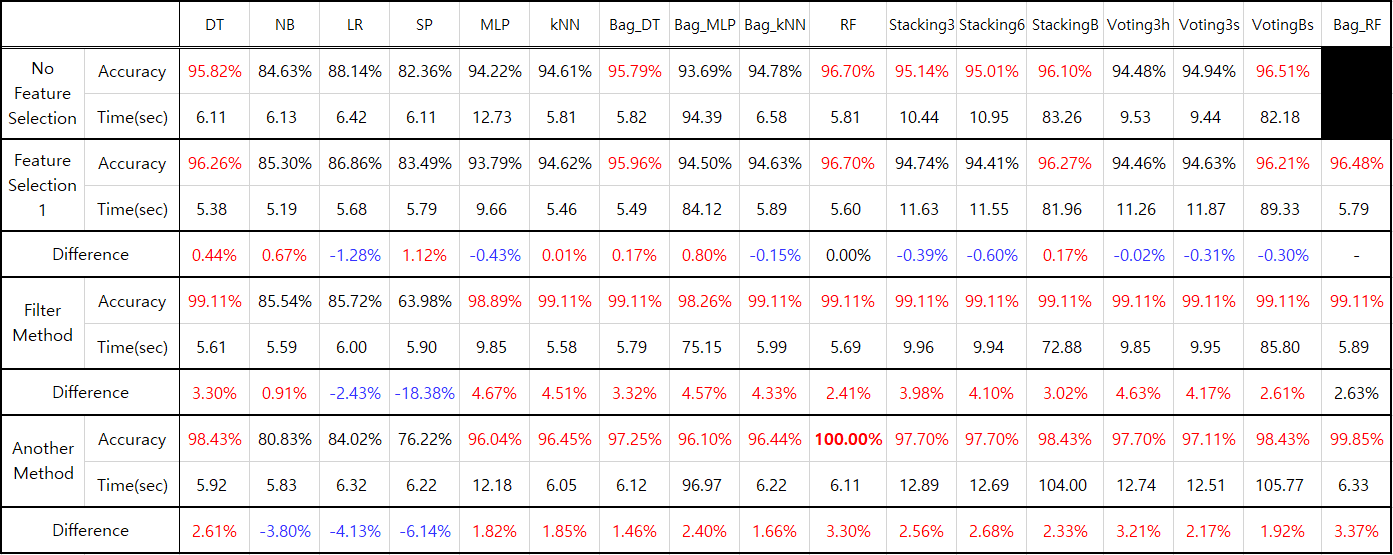

우연히 발견한 4개의 feature로 구성된 feature subset은 엄청난 효과를 보였다. <br>
Bagging(RF)를 포함한 17개의 classifier 중 12개의 classifier가 99.11이라는 높은 정확도를 가졌기 때문이다. 

사실 99.11%라는 수치는 단순히 높은 정확도에 의해 기뻐할 것이 아니라, overfitting을 의심해보아야 하는 의심스러운 수치라고 생각한다. 물론 이를 뒷받침하려면 Cross validation에서 overfitting이 발생했다라는 증거가 필요한데, 아직까지 CV에서 overfitting이 발생할 수 있다는 가능성에 대해서는 배우거나 아는 바가 없어 확실치 않다.

또한 12개의 classifier가 소수점 아래 숫자까지 정확히 일치하는 정확도를 보였다는 점도 의문을 가지게 했다. 어쩌면 1.0이 나와야 하는데, data자체에 어떤 오류가 있어서 제대로 classify 되지 않는 0.89%의 instance가 있는 것이 아닐까 생각해본다.

모든 classification 결과에서 가장 높은 정확도를 보인 것은 자체적으로 제작한 방식으로 feature selection을 수행한 another method의 결과물인 feature set을 RF로 classification한 결과였다. 표 상에서는 100%가 나왔지만, 위에서 10번의 반복시행에 대한 평균을 내었을 때 그 수치는 99.45%였다. 마찬가지로 Bagging_RF의 결과도 99.85%의 정확도를 보였기에 추가적으로 10번의 시행에 대한 평균을 구해보았다.

In [146]:
time0 = time.time()
score = 0
for k in range(0, 10) :
    scores = cross_val_score(bagging_RF,mush_fin_x,mush_fin_y,cv=10,n_jobs=-1)
    score = score + (scores.mean()/10)
time1 = time.time()
print(score)
print(time1-time0, "seconds")

0.9985203452527746
81.12028050422668 seconds


10번의 평균을 구한 결과도 99.85%의 정확도를 보였다. 따라서 모든 모델링 중 가장 높은 정확도를 보인 classifier는 RF를 기반으로 한 bagging라고 할 수 있다. 

추가적으로 feature selection을 거치고 난 이후의 feature set들로 classification을 수행한 결과 전반적으로 모든 모델들의 정확도가 향상된 것을 알 수 있었다. 다만, NB, LR, SP에 대해서는 정확도의 감소가 발생했는데, 이는 아마도 feature수가 줄어듬으로 인해 선형적으로 분류함에 있어서 어려움이 발생했기 때문이 아닌가 추측한다. 

### b. Dataset analysis.

실험을 진행하면서 이 Dataset의 특징에 대해 몇 가지를 추론해보았다. 우선, mushroom classification은 그 자체가 분류가 쉬운 편에 속하는 dataset이다. 그도 그럴것이 최종 feature로 선택된 subset도 8개의 feature만으로 99.85%의 classification을 수행하고, 아무런 전처리를 거치지 않고 classification을 수행해도 최소 82%의 정확도를 보이기 때문이다.

또한 filter method에서 수행한 feature evaluation을 보면, 최하위 몇몇 feature를 제외하고는 전반적인 feature들이 비슷한 수준의 영향력을 행사하고 있음을 추측할 수 있다. 

하지만 another method의 진행과정을 잘 보면 분명 feature들 간에 편차가 존재한다는 사실을 알 수 있었다. 어느정도 정확도를 저하시키는 feature들이 존재해 해당 feature들을 제거함으로써 전체적인 성공률을 상승시킬 수 있었다.

### c. Final solution

결과적으로 시간적인 측면이나 정확도 부분에서도 가장 우월한 성능을 보인 Classifier는 Bagging based on Random Forest Classifier이었다. 대부분 경우에서 가장 높은 정확도를 보였고, 속도 또한 빨랐다.

Feature selection에서 variance를 기준으로 한 feature selection은 크게 영향을 끼치지는 못 했다. 사실 위에 명시된 결과가 아닌 몇 번의 수행을 더 해 보았는데, 전반적으로 성능향상이 이루어지기는 했다. 아마도, feature 수 자체가 줄고, 혼란도가 줄어 약간의 성능 향상이 이루어진 것이라고 생각된다.

반면에 filter method를 사용해 접근한 방법과 자체적으로 제작한 방법은 큰 성과를 거두었다. 본 Dataset은 Mushroom의 식용 가능 여부를 판단하게 하는 근거가 되는 자료인데, 그 feature가 23개나 된다면 학습된 결과를 인간이 이용하기에도 불편함이 발생할 것이다. 따라서 굳이 존재할 필요가 없는 feature들을 제거해주고 전체적인 정확도를 향상시키는 것은 큰 의미를 가진다.

feature selection-2의 filter method는 효과가 있었다. feature evaluation을 수행해 결과를 가지고 순위를 매기자, 하위 feature들로 구성된 feature set은 그렇지 않은 feature set에 비해 상대적으로 낮은 정확도를 보였다. 결과적으로 상위 5개의 feature만으로 전체 feature에 대해 classification을 수행한 것과 동일한 수준의 정확도를 얻을 수 있었고, 의외로 발견하게된 조합은 99.11%의 놀라운 정확도를 보였다.

하지만 이는 내가 알지 못하는 방식의 overfitting이 발생했을 가능성을 내비친다고 느꼈다. 논리적인 근거를 찾지 못했지만, 12개의 classifier가 완전히 동일한 정확도를 보인 것은 feature들의 수가 4개로 너무 적어 classification이 너무 단순해진 것은 아닐까 추측한다. 그럼에도 불구하고 앞서 언급했듯, overfitting이 발생했을 가능성을 최대한 배제한 상황이어서 이를 추가적으로 검증할 방법을 찾지 못했다. 우선은 Cross Validation을 이용했고, 그 안에 kFold도 Stratified kFold를 이용했다. 따라서 99.11%는 분명 의심을 하는 것이 적절한 대응이라 할 수 있는 정확도지만, 현재 상황으로썬 그저 classification이 잘 이루어지는 dataset이고, 그 중에서도 feature selection이 잘 되었다 라고 밖에 판단할 수 없었다.

마지막으로 수행한 another feature selection method는 가장 좋은 성능을 보였다. 17개의 dataset 중 9개를 제거하고 8개의 feature만으로 classification을 수행한 결과, Bagging_RF에서 99.85%의 정확도를 얻을 수 있었다. 수행시간이 6.33초인것을 생각하면 더더욱 가장 적합한 솔루션이라고 생각된다. 또한 filter method의 결과와는 다르게 16개의 Modeling에서 대부분의 모델들이 각각 다른 정확도를 보였다. 이 결과를 보면 더더욱 filter method의 결과물이 무언가 신뢰하기 어려운 결과라고 생각한다. 또한 접근방법에 있어서도 filter method의 4개짜리 feature set은 우연에 의해 발견되었지만, another method의 8개짜리 feature set은 일종의 gradient descent 방식으로 접근해 조금씩 성공률을 높여나간 결과이기에 더욱 신뢰가 간다.

따라서, 본 실험에서 사용한 Dataset의 최종 솔루션과 그 정확도는 
# Ensemble-Bagging based on RandomForestClassifier,  99.85%
이며, 이때 사용된 feature set은 ['habitat', 'odor', 'bruises', 'gill-size', 'stalk-shape', 'stalk-color-above-ring', 'cap-surface', 'stalk-surface-above-ring'] 이다.
